## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df=pd.read_excel('dataset.xlsx')

In [13]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Wrangling

In [14]:
pd.Series(df.columns)

0                                             Patient ID
1                                   Patient age quantile
2                                 SARS-Cov-2 exam result
3         Patient addmited to regular ward (1=yes, 0=no)
4      Patient addmited to semi-intensive unit (1=yes...
                             ...                        
106                   HCO3 (arterial blood gas analysis)
107                    pO2 (arterial blood gas analysis)
108                                        Arteiral Fio2
109                                             Phosphor
110                   ctO2 (arterial blood gas analysis)
Length: 111, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


#### Analysing the missing data 

In [16]:
a= df.isnull().sum()/5643

In [17]:
b=pd.DataFrame(a)
b

,0
Patient ID,0.000000
Patient age quantile,0.000000
SARS-Cov-2 exam result,0.000000
"Patient addmited to regular ward (1=yes, 0=no)",0.000000
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.000000
...,...
HCO3 (arterial blood gas analysis),0.995393
pO2 (arterial blood gas analysis),0.995393
Arteiral Fio2,0.996633
Phosphor,0.996633


In [18]:
d=b.loc[b[0]<0.8]

In [19]:
d

,0
Patient ID,0.000000
Patient age quantile,0.000000
SARS-Cov-2 exam result,0.000000
"Patient addmited to regular ward (1=yes, 0=no)",0.000000
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.000000
"Patient addmited to intensive care unit (1=yes, 0=no)",0.000000
Respiratory Syncytial Virus,0.760234
Influenza A,0.760234
Influenza B,0.760234
Parainfluenza 1,0.760588


All the columns having missing values more than 80% of total data points are dropped since they do not carry relavnt information and can sometimes leads to unexpected error.

<----------------------------------------------------------------------------------------xxx------------------------------------------------------------------------------------------------------------------>

New data is created which contains only the columns which have less than 80% missing values

In [10]:
data= df[['SARS-Cov-2 exam result','Patient ID','Patient age quantile','Patient addmited to regular ward (1=yes, 0=no)',
         'Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)',
         'Respiratory Syncytial Virus','Influenza A','Influenza B','Parainfluenza 1',
        'CoronavirusNL63','Rhinovirus/Enterovirus','Coronavirus HKU1','Parainfluenza 3','Chlamydophila pneumoniae','Adenovirus',
        'Parainfluenza 4','Coronavirus229E','CoronavirusOC43','Inf A H1N1 2009','Bordetella pertussis','Metapneumovirus','Parainfluenza 2']]

In [11]:
data.head()

,SARS-Cov-2 exam result,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,negative,44477f75e8169d2,13,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,126e9dd13932f68,17,0,0,0,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,negative,a46b4402a0e5696,8,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,f7d619a94f97c45,5,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,d9e41465789c2b5,15,0,0,0,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [12]:
data=data.drop(['Patient ID'], axis=1)

In [13]:
data.head()

,SARS-Cov-2 exam result,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,negative,13,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,17,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,negative,8,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,5,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,15,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [14]:
data['Influenza A'].unique()

array([nan, 'not_detected', 'detected'], dtype=object)

In [15]:
data['CoronavirusOC43'].unique()

array([nan, 'not_detected', 'detected'], dtype=object)

## Missing Value Treatment

In [16]:
data.columns

Index(['SARS-Cov-2 exam result', 'Patient age quantile',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')

Since we have included the columns which have even more than 50% of missing values, so we fill "UNAVAILABLE" in place of missing values of the columns

In [17]:
data['Respiratory Syncytial Virus']= data['Respiratory Syncytial Virus'].fillna('unavailable')

In [18]:
data['Influenza A']= data['Influenza A'].fillna('unavailable')

In [19]:
data['Influenza B']= data['Influenza B'].fillna('unavailable')

In [20]:
data['Parainfluenza 1']= data['Parainfluenza 1'].fillna('unavailable')

In [21]:
data['CoronavirusNL63']= data['CoronavirusNL63'].fillna('unavailable')

In [22]:
data['Rhinovirus/Enterovirus']= data['Rhinovirus/Enterovirus'].fillna('unavailable')

In [23]:
data['Coronavirus HKU1']= data['Coronavirus HKU1'].fillna('unavailable')

In [24]:
data['Parainfluenza 3']= data['Parainfluenza 3'].fillna('unavailable')

In [25]:
data['Chlamydophila pneumoniae']= data['Chlamydophila pneumoniae'].fillna('unavailable')

In [26]:
data['Adenovirus']= data['Adenovirus'].fillna('unavailable')

In [27]:
data['Parainfluenza 4']= data['Parainfluenza 4'].fillna('unavailable')

In [28]:
data['Coronavirus229E']= data['Coronavirus229E'].fillna('Coronavirus229E')

In [29]:
data['CoronavirusOC43']= data['CoronavirusOC43'].fillna('unavailable')

In [30]:
data['Inf A H1N1 2009']= data['Inf A H1N1 2009'].fillna('unavailable')

In [31]:
data['Bordetella pertussis']= data['Bordetella pertussis'].fillna('unavailable')

In [32]:
data['Metapneumovirus']= data['Metapneumovirus'].fillna('unavailable')

In [33]:
data['Parainfluenza 2']= data['Parainfluenza 2'].fillna('unavailable')

In [34]:
data.head()

,SARS-Cov-2 exam result,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,negative,13,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable
1,negative,17,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,negative,8,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable
3,negative,5,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable
4,negative,15,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


--------------------------------------------------------------------------------------------------

Convert the values : negative ---> 0 and positive ----> 1 for the target column

In [35]:
data['SARS-Cov-2 exam result']= data['SARS-Cov-2 exam result'].replace({'negative': 0 , 'positive': 1}).astype(int)

In [36]:
data.head()

,SARS-Cov-2 exam result,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,0,13,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable
1,0,17,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,0,8,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable
3,0,5,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable
4,0,15,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## Exploratory Data Analysis

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   SARS-Cov-2 exam result                                 5644 non-null   int32 
 1   Patient age quantile                                   5644 non-null   int64 
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64 
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64 
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64 
 5   Respiratory Syncytial Virus                            5644 non-null   object
 6   Influenza A                                            5644 non-null   object
 7   Influenza B                                            5644 non-null   object
 8   Parainfluenza 1                                        564

 -------------------------------------------------------------------------------------------

Statistically describe the Numerical data

In [38]:
data.describe()

,SARS-Cov-2 exam result,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.098866,9.318391,0.013997,0.008859,0.007264
std,0.298509,5.777903,0.117489,0.093713,0.084929
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,0.000000
50%,0.000000,9.000000,0.000000,0.000000,0.000000
75%,0.000000,14.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,1.000000,1.000000,1.000000


### Bi-variate Analysis

Analysis of variables or features with respect to the target label, to gain the insights and relationship between the input features and their impact on the spread of the Covid

#### 1. Age group vs Covid

<AxesSubplot:xlabel='SARS-Cov-2 exam result', ylabel='Patient age quantile'>

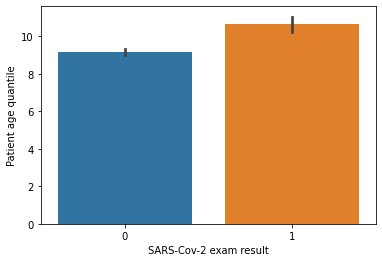

In [39]:
sns.barplot(x='SARS-Cov-2 exam result',y='Patient age quantile',data=data)

Note : The top of the bar is the mean; the width of the bar is the standard deviation; the vertical line is the range of values or standard error

<AxesSubplot:xlabel='Patient age quantile'>

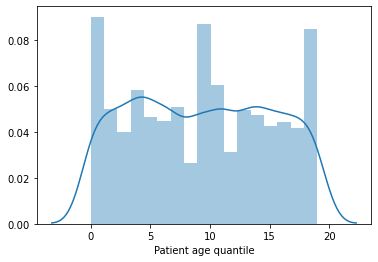

In [40]:
sns.distplot(data['Patient age quantile'])

It is kind of Bimodular Histogram which depicts that the children/person in the age group of 5-10 and 10-15 years have the maximum rate of positive test

<AxesSubplot:xlabel='Patient age quantile'>

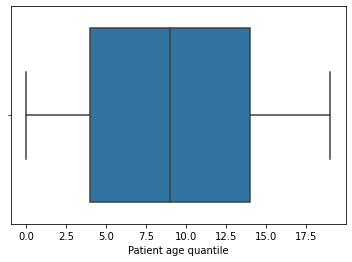

In [41]:
sns.boxplot(data['Patient age quantile'])

Box Plot

-----------------------------------------------------------------------------------------

In [42]:
data['Patient age quantile'].unique()

array([13, 17,  8,  5, 15,  9, 16,  1, 14, 11,  0,  3, 10,  6, 12, 19,  7,
       18,  2,  4], dtype=int64)

#### Creating age groups for the analysis

In [43]:
bins = [0,4,8,12,16,20]
labels = ['below 4', 'bet 4 and 8', 'bet 8 and 12', 'bet 12 and 16', 'above 16']

data['AgeGroup'] = pd.cut(data['Patient age quantile'], bins=bins, labels=labels, right=False)


In [44]:
data.head()

,SARS-Cov-2 exam result,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,AgeGroup
0,0,13,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable,bet 12 and 16
1,0,17,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,above 16
2,0,8,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable,bet 8 and 12
3,0,5,0,0,0,unavailable,unavailable,unavailable,unavailable,unavailable,...,unavailable,unavailable,unavailable,Coronavirus229E,unavailable,unavailable,unavailable,unavailable,unavailable,bet 4 and 8
4,0,15,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,bet 12 and 16


<AxesSubplot:xlabel='AgeGroup', ylabel='SARS-Cov-2 exam result'>

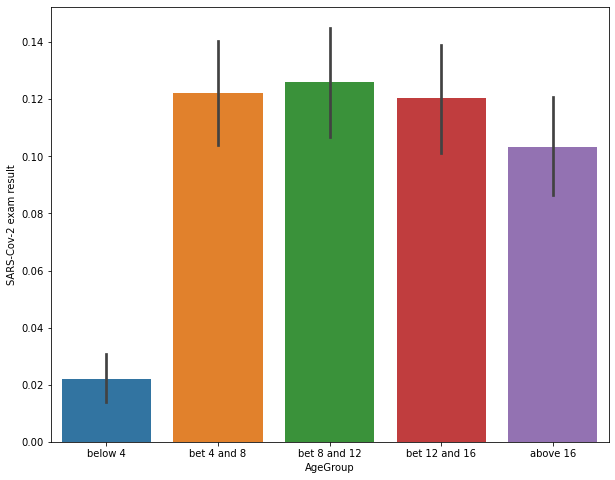

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'AgeGroup', y='SARS-Cov-2 exam result', data=data)

From this Bar graph it can be easily depicted which age group have maximum positive rate of Covid testing

In [46]:
data.groupby('AgeGroup')['SARS-Cov-2 exam result'].agg(np.mean)

AgeGroup
below 4          0.022046
bet 4 and 8      0.122222
bet 8 and 12     0.125912
bet 12 and 16    0.120594
above 16         0.103160
Name: SARS-Cov-2 exam result, dtype: float64

Here we can clearly see that the positive rate of Covid spread is high in the age group of 8 to 12 and minimum for the age group 
below 4 years and above 15 years

-------------------------------------------------------------------------

### Patient Admitted Unit vs Covid Result

<AxesSubplot:xlabel='Patient addmited to regular ward (1=yes, 0=no)', ylabel='SARS-Cov-2 exam result'>

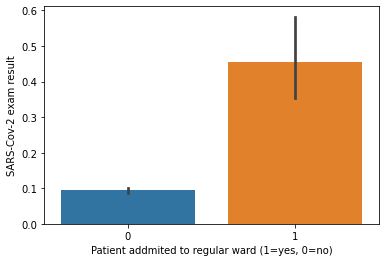

In [47]:
sns.barplot(x= 'Patient addmited to regular ward (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=data)

<AxesSubplot:xlabel='Patient addmited to semi-intensive unit (1=yes, 0=no)', ylabel='SARS-Cov-2 exam result'>

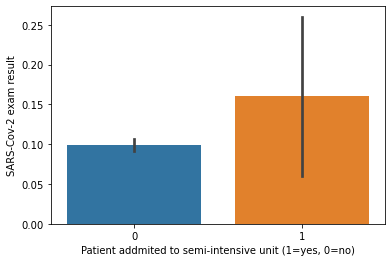

In [48]:
sns.barplot(x= 'Patient addmited to semi-intensive unit (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=data)

<AxesSubplot:xlabel='Patient addmited to intensive care unit (1=yes, 0=no)', ylabel='SARS-Cov-2 exam result'>

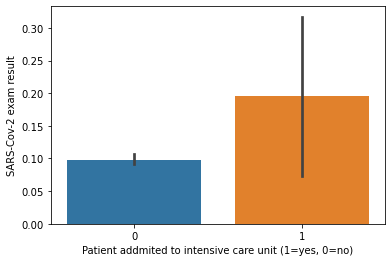

In [49]:
sns.barplot(x= 'Patient addmited to intensive care unit (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=data)

From these above visualizations it can be easily inferred that the person/children who were addmitted to any of the three facilities are having high rate of Positive Covid testing

---------------------------------------------------------------------

### Effect of different other diseases detected vs Covid Result

In [50]:
data.columns

Index(['SARS-Cov-2 exam result', 'Patient age quantile',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'AgeGroup'],
      dtype='object')

<AxesSubplot:xlabel='Parainfluenza 2', ylabel='SARS-Cov-2 exam result'>

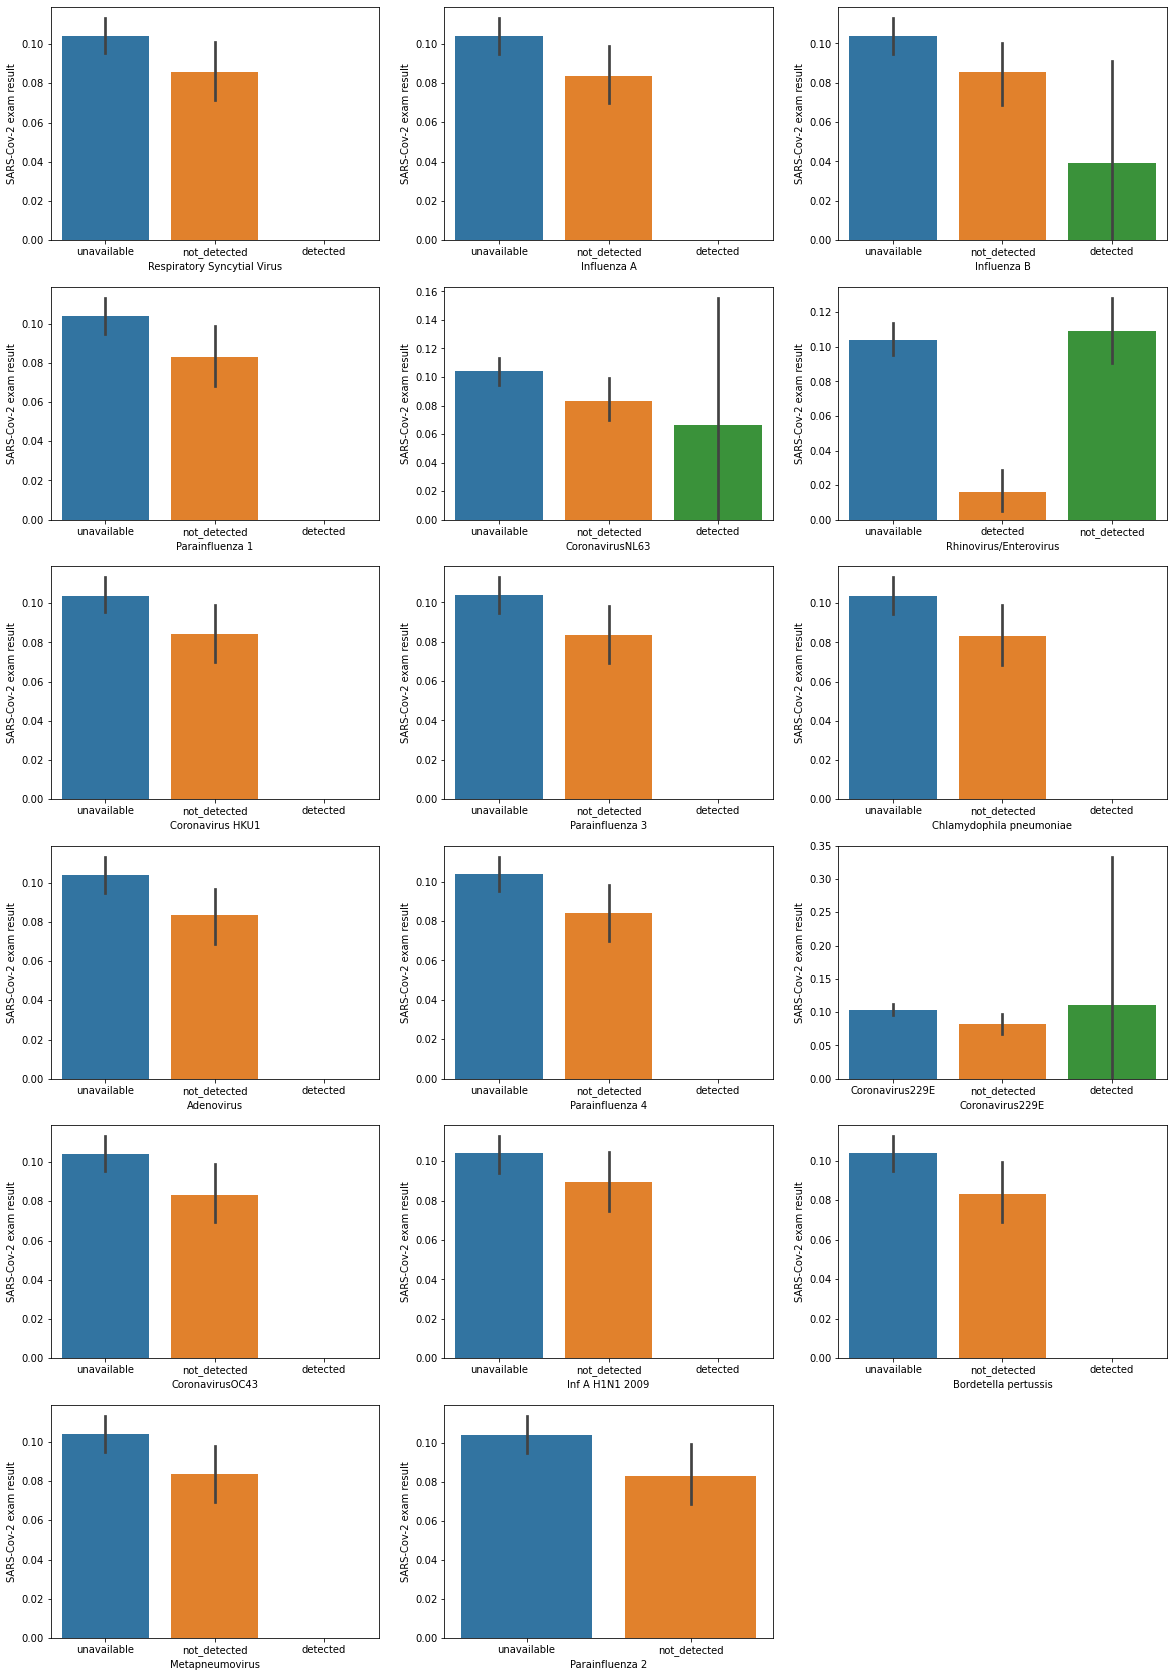

In [51]:
plt.figure(figsize=(20,30))

plt.subplot(6,3,1)
sns.barplot(x='Respiratory Syncytial Virus', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,2)
sns.barplot(x='Influenza A', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,3)
sns.barplot(x='Influenza B', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,4)
sns.barplot(x='Parainfluenza 1', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,5)
sns.barplot(x='CoronavirusNL63', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,6)
sns.barplot(x='Rhinovirus/Enterovirus', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,7)
sns.barplot(x='Coronavirus HKU1', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,8)
sns.barplot(x='Parainfluenza 3', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,9)
sns.barplot(x='Chlamydophila pneumoniae', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,10)
sns.barplot(x='Adenovirus', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,11)
sns.barplot(x='Parainfluenza 4', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,12)
sns.barplot(x='Coronavirus229E', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,13)
sns.barplot(x='CoronavirusOC43', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,14)
sns.barplot(x='Inf A H1N1 2009', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,15)
sns.barplot(x='Bordetella pertussis', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,16)
sns.barplot(x='Metapneumovirus', y='SARS-Cov-2 exam result' , data=data )

plt.subplot(6,3,17)
sns.barplot(x='Parainfluenza 2', y='SARS-Cov-2 exam result' , data=data )



From these illustration we can clearly see that only ---> Influenza B , CoronavirusNL63 , Coronavirus229E diseases have a slight impact on the positive spread of COVID-19

----------------------------------------------------------------------------------------------------------------

### Data Prepration for Model

So from the above Exploartory Data Analysis, the features which contribute significantly as well as the features that have atleast a slight impact on the results of Covid are used in the model Building

In [52]:
final_data= data[['SARS-Cov-2 exam result','AgeGroup','Patient addmited to regular ward (1=yes, 0=no)',
                 'Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)',
                 'Influenza B','CoronavirusNL63','Coronavirus229E']]

In [53]:
final_data.head()

,SARS-Cov-2 exam result,AgeGroup,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Influenza B,CoronavirusNL63,Coronavirus229E
0,0,bet 12 and 16,0,0,0,unavailable,unavailable,Coronavirus229E
1,0,above 16,0,0,0,not_detected,not_detected,not_detected
2,0,bet 8 and 12,0,0,0,unavailable,unavailable,Coronavirus229E
3,0,bet 4 and 8,0,0,0,unavailable,unavailable,Coronavirus229E
4,0,bet 12 and 16,0,0,0,not_detected,not_detected,not_detected


------------------------------------------------------------------------------------

Label Encoding is done here below

In [54]:
final_data['AgeGroup']=final_data['AgeGroup'].replace({'below 4': 1, 'bet 4 and 8':2, 'bet 8 and 12':3, 'bet 12 and 16':4, 'above 16':5}).astype(int)

C:\Users\Mahaveer\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
final_data['Influenza B']= final_data['Influenza B'].replace({'not_detected':0, 'unavailable':1 , 'detected':2})

C:\Users\Mahaveer\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
final_data['CoronavirusNL63']= final_data['CoronavirusNL63'].replace({'not_detected':0, 'unavailable':1 , 'detected':2})
final_data['Coronavirus229E']= final_data['Coronavirus229E'].replace({'not_detected':0, 'Coronavirus229E':1 , 'detected':1})

C:\Users\Mahaveer\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mahaveer\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
final_data.head()

,SARS-Cov-2 exam result,AgeGroup,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Influenza B,CoronavirusNL63,Coronavirus229E
0,0,4,0,0,0,1,1,1
1,0,5,0,0,0,0,0,0
2,0,3,0,0,0,1,1,1
3,0,2,0,0,0,1,1,1
4,0,4,0,0,0,0,0,0


In [58]:
final_data.head()

,SARS-Cov-2 exam result,AgeGroup,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Influenza B,CoronavirusNL63,Coronavirus229E
0,0,4,0,0,0,1,1,1
1,0,5,0,0,0,0,0,0
2,0,3,0,0,0,1,1,1
3,0,2,0,0,0,1,1,1
4,0,4,0,0,0,0,0,0


In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   SARS-Cov-2 exam result                                 5644 non-null   int32
 1   AgeGroup                                               5644 non-null   int32
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64
 5   Influenza B                                            5644 non-null   int64
 6   CoronavirusNL63                                        5644 non-null   int64
 7   Coronavirus229E                                        5644 non-null   int64
dtypes: int32(2), int64(6)
memory usage: 308.8 KB


In [80]:
final_data['SARS-Cov-2 exam result'].mean()

0.09886605244507442

From this statistics it can be easily seen that this dataset is a Skewed dataset which means that positive class contribute to 90% of the dataset while the neagtive class contribute to around 10% only

## Machine Leraning Model

In [108]:
y = final_data['SARS-Cov-2 exam result']

In [109]:
X= final_data.drop(['SARS-Cov-2 exam result'], axis = 1)

In [110]:
X.head()

,AgeGroup,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Influenza B,CoronavirusNL63,Coronavirus229E
0,4,0,0,0,1,1,1
1,5,0,0,0,0,0,0
2,3,0,0,0,1,1,1
3,2,0,0,0,1,1,1
4,4,0,0,0,0,0,0


In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test , y_train , y_test = train_test_split(X , y, random_state = 0 , test_size= 0.2)

In [134]:
rm= RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

In [135]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score

In [136]:
predict = rm.predict(X_test)

In [137]:
accuracy_score(y_test , predict)

0.9052258635961028

Since it is skewed data so accuracy is not the major metric to evaluate our learning algorithm,  
So we use f1 score as our Evaluating metric of algorithm

In [138]:
confusion_matrix(y_test , predict)

array([[1016,    2],
       [ 105,    6]], dtype=int64)

In [139]:
precision_score(y_test , predict)

0.75

In [140]:
recall_score(y_test , predict)

0.05405405405405406

In [141]:
f1_score(y_test , predict, average='weighted')

0.8664920116425965

In [142]:
f1_score(y_test , predict, average='micro')

0.9052258635961028

In [143]:
f1_score(y_test , predict, average='macro')

0.525408480362692

In [144]:
f1_score(y_test , predict, average='binary')

0.10084033613445378

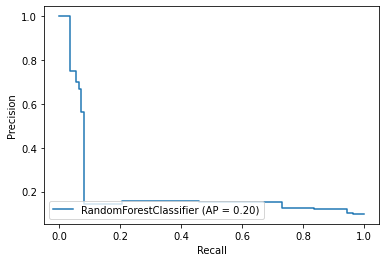

In [145]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


disp = plot_precision_recall_curve(rm, X_test, y_test)

#### Hyper-parameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [127]:
parameters = [{'n_estimators':[10, 50 ,100, 150]}]

grid_search = GridSearchCV(estimator = rm ,
                          param_grid = parameters,
                          cv = 5,
                          n_jobs = -1)

grid_search = grid_search.fit(X_train , y_train)

In [128]:
grid_search.best_score_

0.8992248062015504

In [129]:
grid_search.best_params_

{'n_estimators': 50}

-------------------------------------------------------------------------------------